# [ 선형회귀(Linear Regression) ]

- 예측 : 특정한 입력변수 값을 사용해서 출력변수의 값을 계산하는 것 (연속적인 타깃을 예측하는 알고리즘)
    - 출력변수의 값이 연속값인 문제 : 회귀 or 회귀분석 문제
<br>
<br />
- 회귀분석 : 독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 f(x)를 찾는 과정  

$$ \hat{y}= f(x) ≈ y $$

- 가장 간단한 지도 학습 알고리즘 중 하나
- Linear regression은 종속변수  y와 한개 이상의 독립 변수  X와의 선형관계를 모델링
    - 선형 관계의 modeling은 1차로 이루어진 직선을 구하는 것

---

## Simple Linear Regression : 독립변수가 하나인 직선 
$$f(x_i) = wx_i + b$$

- $\omega$ : 가중치(weight)
- $b$ : 편향(bias)

<br />

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/residuals.png
" width="400" height="300" />

- 예측한 값과 실제 데이터가 가장 비슷한 직선을 찾는 것
- $f(x_i)$ : model의 예측값. 파란 선
- $y$ : 실제 데이터. 빨간 점

### Cost Function (비용함수)
- **실제 데이터(위 그림에서 빨간 점) 과 직선 사이의 차이를 줄이는 것**이 목적 
- cost function을 최소로 하는  w 와  b 를 찾아보자.
- 이차함수의 최솟값을 구하는 방법은? : 미분한 지점이 0이 되는 것
$$\text{cost function} = \frac{1}{N}\sum_{i=1}^n (y_i - f(x_i))^2$$
-> MSE(Mean Squared Error, 평균 제곱 오차)를 비용함수로 사용

- 머신러닝 알고리즘에서 최적화(Optimizer)는 비용함수의 값이 가장 작아지는 최적의 파라미터를 찾는 과정
    - 이를 달성하기 위해서, 경사하강법(Gradient Descent) 기반의 방식이 가장 기본이 되는 알고리즘

### 최솟값 구하는 방법1) 미분

다음 식의 최솟값을 어떻게 찾을 수 있을까? 
- 미분한 값이 0이 되는 지점 -> 최솟값이 되는 지점 (왜?) 
$$f(w) = w^2 + 3w -5$$


In [7]:
!pip install sympy

     ---------------------------------------- 6.5/6.5 MB 41.4 MB/s eta 0:00:00
     ------------------------------------- 532.6/532.6 kB 32.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


- sympy Library

    - 방정식 기호(symbol)를 사용하게 해주는 라이브러리
    - 기호 기반 수학 라이브러리 -> 변수를 기호로 선언해주어야함
    - sympy.symbols( ) : x처럼 방정식에 사용하는 미지수를 나타내는 기호를 생성할 때 사용

In [8]:
import sympy # 기호 계산을 위한 오픈 소스 Python 라이브러리
import numpy

from matplotlib import pyplot
%matplotlib inline
sympy.init_printing() # 수식을 LaTex 스타일로 표시

In [9]:
x = sympy.Symbol("x", real= True) # 실수

f = x**2 + 1*x -6
f

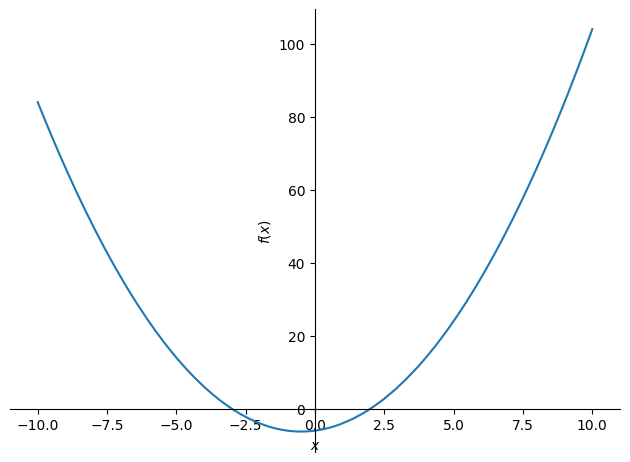

In [10]:
sympy.plotting.plot(f)

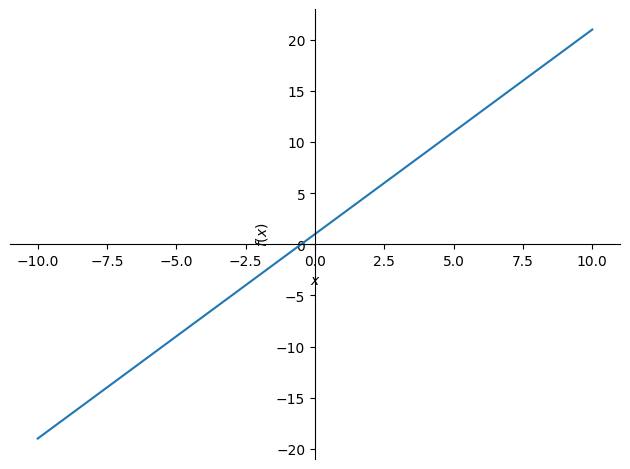

In [11]:
# 1차 미분
fprime = f.diff(x) # numpy.diff
fprime
sympy.plotting.plot(fprime)

In [12]:
# 1차 미분식의 해
sympy.solve(fprime, x) # 2x+1 값의 해 구하기

### 최솟값 구하는 방법2) 경사하강법(Gradient Descent, GD)
- Gradient Descent 구현

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />


---

## Exercise : 지구 온도변화
- linear regression을 이용해 지구 온도변화를 예측, 직선 구하기  
https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD  

1) 연도에 따른 데이터 상승을 그래프로 확인
2) sklearn을 이용해 linear 그래프 예측

In [15]:
import pandas as pd 

In [29]:
url = "https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD"

data = pd.read_csv(url, header=4)
data

,Year,Value
0,1880,-0.47
1,1881,-0.45
2,1882,-0.41
3,1883,-0.60
4,1884,-0.60
...,...,...
132,2012,0.92
133,2013,1.01
134,2014,1.02
135,2015,1.35


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    137 non-null    int64  
 1   Value   137 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


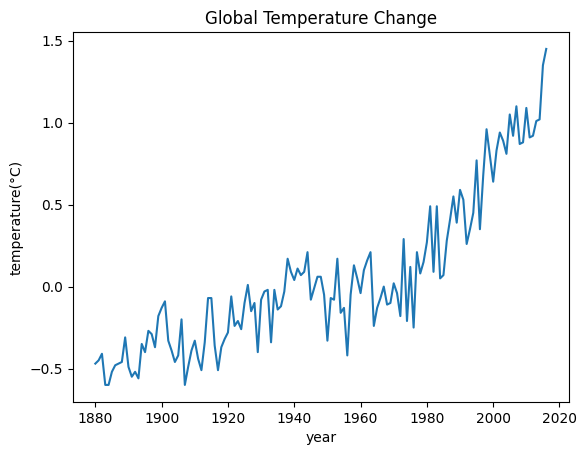

In [46]:
# 연도에 따른 데이터 상승을 그래프로 확인

import matplotlib.pyplot as plt
plt.plot(data.Year, data.Value)  
plt.title("Global Temperature Change")

plt.xlabel("year")
plt.ylabel("temperature(°C)")

plt.show()

In [50]:
# sklearn을 이용한 linear 그래프 예측
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression() # fit_intercept=True : 모형에 상수항 존재, y절편을 구한다는 의미. defalut

x_data = data["Year"]
y_data = data["Value"]

model.fit(x_data.values.reshape(-1,1), y_data)

LinearRegression()

In [51]:
print(model.coef_)
print(model.intercept_)

[0.01037028]
-20.148685384658474


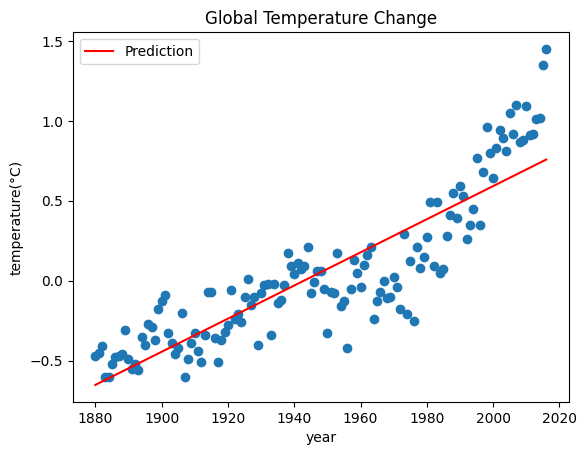

In [67]:
# 기존 X 값으로 y를 예측하게 해서 그래프 생성
# 학습된 model에 학습시킨 데이터를 다시 넣어 확인

# y_pred = model.predict(x_data)

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, model.predict(x_data.values.reshape(-1,1)), color='red', label="Prediction")
plt.title("Global Temperature Change")
plt.xlabel("year")
plt.ylabel("temperature(°C)")
plt.legend()
plt.show()